In [2]:
import pandas as pd
import numpy as np

In [3]:
from fastbook import * 
from pathlib import Path 

In [4]:
searches = ('beer', 'rum', 'tequila', 'whiskey', 'vodka')
path = Path('alcohol_images')

if not path.exists():
    path.mkdir(parents=True, exist_ok=True)
    for o in searches: 
        dest = path / o
        dest.mkdir(parents=True, exist_ok=True)
        results = search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:200])
        resize_images(dest, max_size=400, dest=dest)

In [5]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#24) [None,None,None,None,None,None,None,None,None,None...]

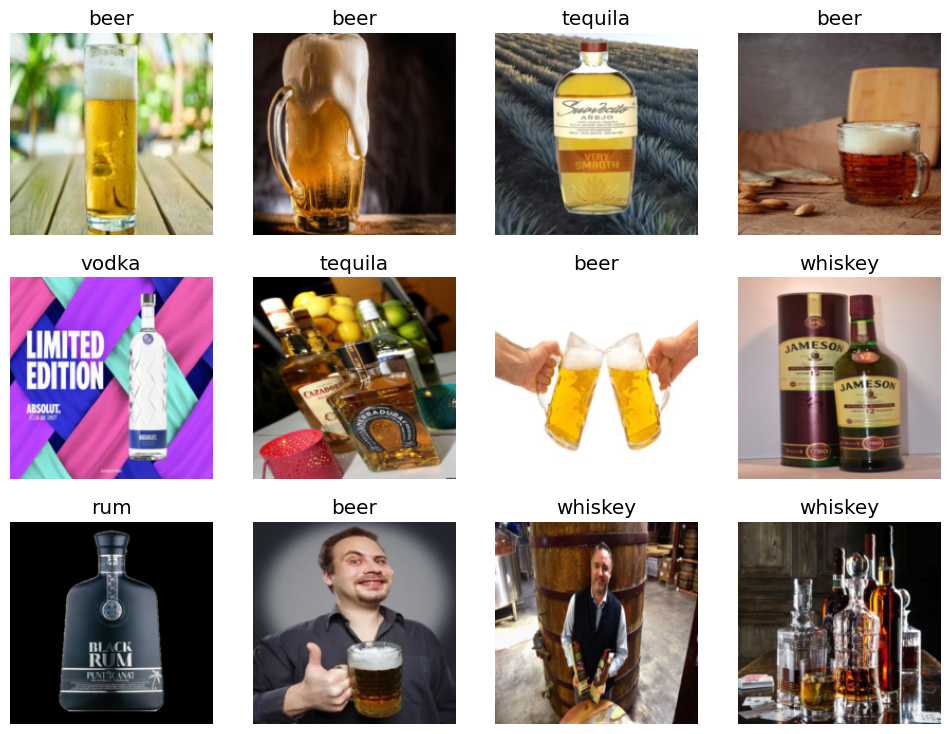

In [17]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, 
    item_tfms= [Resize(192,method='squish')],
).dataloaders(path)

dls.show_batch(max_n=12) # easy to just look at data

In [27]:
learn = vision_learner(dls, resnet18, metrics=error_rate) # vision_learner is the new name  
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.446380,1.280900,0.417582,00:04


epoch,train_loss,valid_loss,error_rate,time
0,1.417612,1.057974,0.395604,00:05
1,1.051357,1.023991,0.368132,00:05
2,0.772145,1.010842,0.340659,00:04
3,0.585409,1.001433,0.362637,00:04


In [28]:
alcohol_type, _, probs = learn.predict(PILImage.create('data/Beer.jpg'))
print(f"This is a: {alcohol_type}.")
print(f"Probability it's a beer: {probs[0]:.4f}")

This is a: beer.
Probability it's a beer: 0.5882


In [29]:
learn.save('alcohol_classifier')

Path('models/alcohol_classifier.pth')